In [1]:
import pandas as pd
import os
import numpy as np
from glob import glob

In [2]:
files = glob('listings_*')

In [3]:
files.sort()
files

['listings_1.csv',
 'listings_10.csv',
 'listings_11.csv',
 'listings_12.csv',
 'listings_2.csv',
 'listings_3.csv',
 'listings_4.csv',
 'listings_5.csv',
 'listings_6.csv',
 'listings_7.csv',
 'listings_8.csv',
 'listings_9.csv']

In [4]:
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,2019-11-04,0.39,2,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,2019-11-27,4.65,1,161
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.39,1,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,459,2019-12-12,3.53,1,233


In [5]:
data.shape

(570365, 16)

In [6]:
data.drop_duplicates(keep=False,inplace=True)

In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,2019-11-27,4.65,1,161
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.39,1,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,459,2019-12-12,3.53,1,233
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.94,1,0


In [8]:
#data[data['name'].isnull()].sum()

In [9]:
data.isnull().sum()

id                                    0
name                                 49
host_id                               0
host_name                           263
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       53998
reviews_per_month                 53999
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Fill NaN with an empty string and check missing values again
data['name'].fillna('', inplace=True)
data['name'].isnull().sum()

0

# 2. Remove punctuation, digits and special characters.


In [11]:
import re


In [12]:
def remove_punct(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

data['clean_name'] = data['name'].apply(remove_punct)

In [13]:
# Let's compare raw and cleaned texts.
data[['name', 'clean_name']]

,name,clean_name
1,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
2,Large Cozy 1 BR Apartment In Midtown East,large cozy br apartment in midtown east
3,BlissArtsSpace!,blissartsspace
4,Large Furnished Room Near B'way,large furnished room near b way
5,Cozy Clean Guest Room - Family Apt,cozy clean guest room family apt
...,...,...
570360,Spacious 1 Queen Bedroom in Central Park,spacious queen bedroom in central park
570361,"5,000 sq ft Downtown Brooklyn Penthouse",sq ft downtown brooklyn penthouse
570362,Spacious 1 Queen Bedroom in Tribeca,spacious queen bedroom in tribeca
570363,Spacious 1 Full Bedroom in Murray Hill,spacious full bedroom in murray hill


# 3. Get rid of stopwords


In [14]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

In [15]:
from nltk.corpus import stopwords

In [16]:
#print(stopwords.words('english'))

In [17]:
import spacy

In [18]:
import nltk 


In [19]:
nlp = spacy.load("en_core_web_sm")

In [20]:

stopwords = nlp.Defaults.stop_words

In [21]:
def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords]
    return " ".join(tokens_no_stop)

In [22]:
data['final_name'] = data['clean_name'].apply(tokenize_no_stopwords)

In [23]:
data[['clean_name', 'final_name']]

,clean_name,final_name
1,cozy entire floor of brownstone,cozy entire floor brownstone
2,large cozy br apartment in midtown east,large cozy br apartment midtown east
3,blissartsspace,blissartsspace
4,large furnished room near b way,large furnished room near b way
5,cozy clean guest room family apt,cozy clean guest room family apt
...,...,...
570360,spacious queen bedroom in central park,spacious queen bedroom central park
570361,sq ft downtown brooklyn penthouse,sq ft downtown brooklyn penthouse
570362,spacious queen bedroom in tribeca,spacious queen bedroom tribeca
570363,spacious full bedroom in murray hill,spacious bedroom murray hill


In [24]:
#first concat all the description in one string

text = ""
for i in data['final_name']:
    text +=" " + i 

In [25]:
# we tokenize it into separate words

tokenized_text = nltk.tokenize.word_tokenize(text)

In [26]:
# creating a frequency dictionary with the help of nltk

freq_dict = nltk.FreqDist(w for w in tokenized_text)

In [27]:
freq_dict

FreqDist({'room': 84906, 'bedroom': 64331, 'private': 63547, 'apartment': 54052, 'cozy': 43020, 'apt': 35175, 'studio': 34234, 'brooklyn': 33275, 'manhattan': 32214, 'br': 31093, ...})

In [28]:
type(freq_dict)

nltk.probability.FreqDist

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

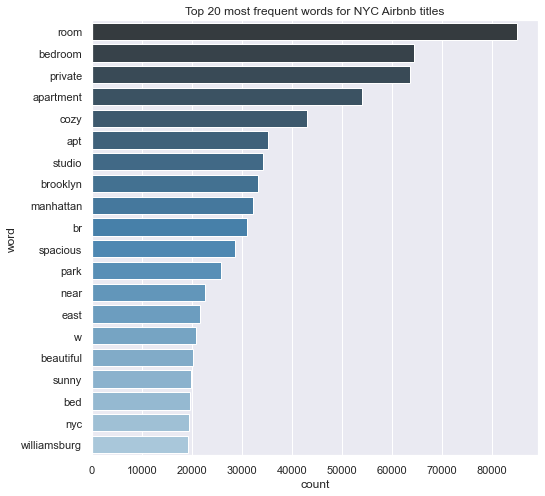

In [30]:
#plotting most freq words
def plot_most_common(dict_data ,title):
    df = pd.DataFrame(dict_data)
    df.columns = ['word', 'count']
    plt.figure(figsize=(8, 8))
    sns.set(style="darkgrid")
    sns.barplot(x="count", y="word", data=df, palette='Blues_d')
    plt.title(title)
    plt.show()
    
plot_most_common(freq_dict.most_common(20), 'Top 20 most frequent words for NYC Airbnb titles')

In [31]:
freq_dict.most_common(20)

[('room', 84906),
 ('bedroom', 64331),
 ('private', 63547),
 ('apartment', 54052),
 ('cozy', 43020),
 ('apt', 35175),
 ('studio', 34234),
 ('brooklyn', 33275),
 ('manhattan', 32214),
 ('br', 31093),
 ('spacious', 28569),
 ('park', 25816),
 ('near', 22663),
 ('east', 21677),
 ('w', 20775),
 ('beautiful', 20199),
 ('sunny', 19860),
 ('bed', 19666),
 ('nyc', 19468),
 ('williamsburg', 19301)]

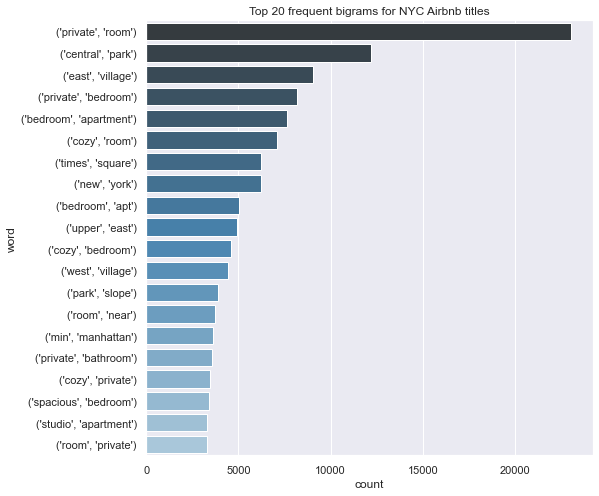

In [32]:
#Most frequent bigrams to describe NYC appartments.
freq_dict_bigrams = nltk.FreqDist(nltk.bigrams(w for w in tokenized_text))
plot_most_common(freq_dict_bigrams.most_common(20), 'Top 20 frequent bigrams for NYC Airbnb titles')

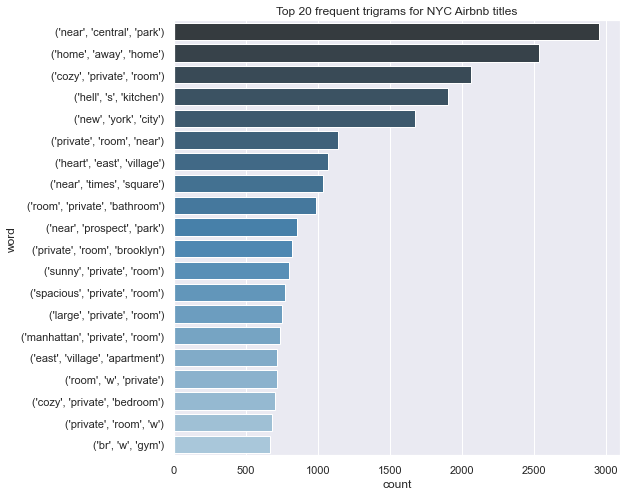

In [33]:
#Most frequent trigrams to describe NYC appartments.

freq_dict_trigrams = nltk.FreqDist(nltk.trigrams(w for w in tokenized_text))
plot_most_common(freq_dict_trigrams.most_common(20), 'Top 20 frequent trigrams for NYC Airbnb titles')

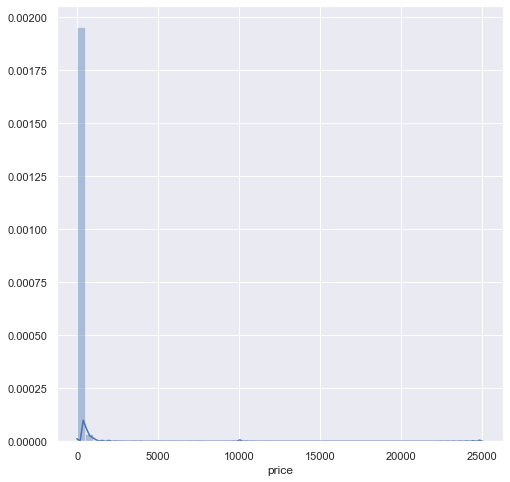

In [34]:
# First, we are going to take a look at the price distribution
plt.figure(figsize=(8, 8))
sns.distplot(data['price'])
plt.show()

In [35]:
data['price'].describe()


count    400974.000000
mean        153.611586
std         374.686385
min           0.000000
25%          65.000000
50%         100.000000
75%         168.000000
max       25000.000000
Name: price, dtype: float64

In [36]:
data['price'].value_counts()

100     14533
150     14435
50      11786
60      10379
75       9977
        ...  
1628        1
734         1
1117        1
862         1
2047        1
Name: price, Length: 1152, dtype: int64

In [37]:
#most apartments have a rent below 200 dollars

# Most frequent wordings for expensive places

exploring the titles of the appartments that cost more than 200 for a night.

In [38]:
costly = data[data['price']>200]
costly.shape

(62932, 18)

In [39]:
costly.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clean_name,final_name
42,14290,* ORIGINAL BROOKLYN LOFT *,56104,James,Brooklyn,Williamsburg,40.70420,-73.93560,Entire home/apt,228,3,90,2019-12-14,0.73,1,179,original brooklyn loft,original brooklyn loft
51,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.11,1,179,sunny spacious chelsea apartment,sunny spacious chelsea apartment
59,16595,LOFT HAVEN ~ Six Windows ~ Bricks ~ Plants ~ Q...,64522,Daniel,Brooklyn,Williamsburg,40.70933,-73.96792,Entire home/apt,250,1,167,2020-01-01,1.49,1,365,loft haven six windows bricks plants quiet,loft haven windows bricks plants quiet
61,16974,SpaHa Loft: Enormous and Bright,65837,Robin,Manhattan,East Harlem,40.80164,-73.93922,Entire home/apt,225,4,208,2019-12-14,1.71,1,241,spaha loft enormous and bright,spaha loft enormous bright
62,17037,Lovely EV Artist's Home,66035,Anna,Manhattan,East Village,40.72162,-73.98008,Entire home/apt,250,5,51,2019-10-24,0.43,1,177,lovely ev artist s home,lovely ev artist s home


In [40]:
# first, we need to concatenate all descriptions in one string
costly_text = ""
for i in costly['final_name']:
    costly_text += " " + i
    
# next, we tokenize it into separate words
tokenized_costly_text = nltk.tokenize.word_tokenize(costly_text)

# finally, create a frequency dictionary with the help of nltk
freq_dict_costly = nltk.FreqDist(w for w in tokenized_costly_text)

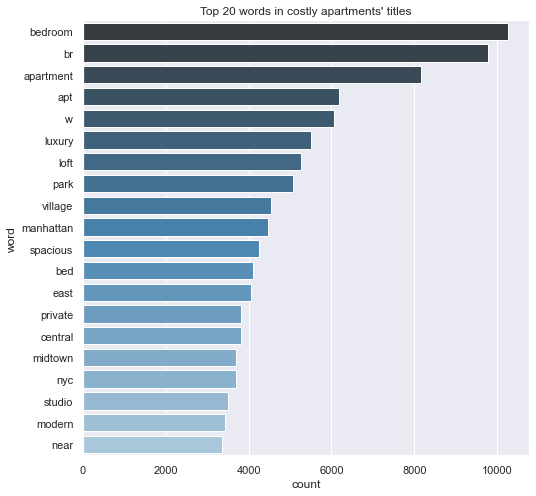

In [41]:
plot_most_common(freq_dict_costly.most_common(20), "Top 20 words in costly apartments' titles")


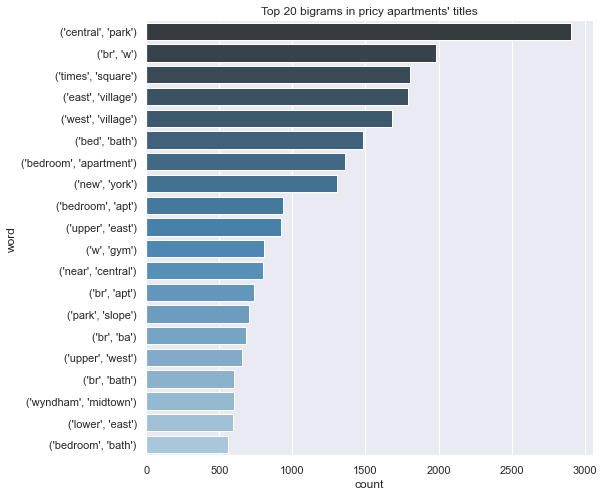

In [42]:
freq_dict_bigrams_costly = nltk.FreqDist(nltk.bigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_bigrams_costly.most_common(20), "Top 20 bigrams in pricy apartments' titles")

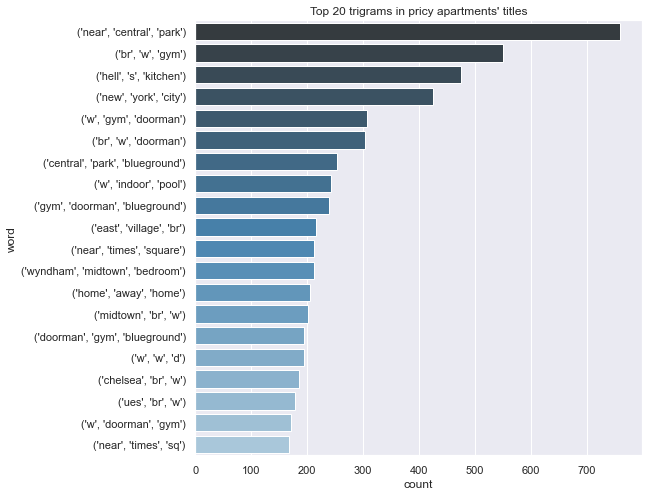

In [43]:
freq_dict_trigrams_costly = nltk.FreqDist(nltk.trigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_trigrams_costly.most_common(20), "Top 20 trigrams in pricy apartments' titles")

In [44]:
def new_target(price):
    if price > 800:
        return 1
    else:
        return 0
        
data['target'] = data['price'].apply(new_target)
data['target'].value_counts()

0    397232
1      3742
Name: target, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:

train, test = train_test_split(data, test_size=0.2, random_state=315, stratify=data['target'])

X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']

In [48]:
X_train.head(3)

325526    luxury single bed share room w gender
453858                 baltic bedroom apartment
272740                    cozy central park pad
Name: final_name, dtype: object

In [49]:
y_train

325526    0
453858    0
272740    0
336166    0
560584    0
         ..
273704    0
328831    0
350059    0
140276    0
478828    0
Name: target, Length: 320779, dtype: int64

In [50]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320779,), (320779,), (80195,), (80195,))

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [53]:
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [54]:
X_test

<80195x7849 sparse matrix of type '<class 'numpy.float64'>'
	with 388716 stored elements in Compressed Sparse Row format>

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [56]:
import imblearn

In [58]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [59]:
#here the classes are not balanced

ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
np.bincount(y_train_ros)

array([317785, 317785], dtype=int64)

In [61]:
import lightgbm 
from lightgbm import *

In [62]:
lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)
preds = lr.predict(X_test)

In [63]:
preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
from sklearn.metrics import classification_report

In [66]:
report_dict = classification_report(y_test, preds, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.999197,0.086782,0.908735,0.542989,0.990687
recall,0.908606,0.922460,0.908735,0.915533,0.908735
f1-score,0.951751,0.158639,0.908735,0.555195,0.944353
support,79447.000000,748.000000,0.908735,80195.000000,80195.000000


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
def draw_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm_norm)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))
    print("Recall: {0:.3f}".format(recall_score(y_test, y_pred)))
    plt.show()

In [72]:
from sklearn.metrics import accuracy_score

In [74]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score


Accuracy: 0.909
Recall: 0.922


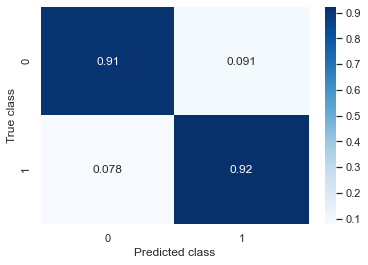

In [75]:
draw_cm(y_test, preds)